# **Clustering Analysis - Bank Transaction Data**

Analisis clustering untuk segmentasi nasabah bank berdasarkan pola transaksi dan karakteristik demografis.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.



# **1. Import Library**
Pada tahap ini, perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import joblib

# **2. Memuat Dataset**
Pada tahap ini, perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   

Dataset diload dari Google Sheets dengan URL berikut:

In [2]:
import pandas as pd

# Load data
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?gid=2020477971&single=true&output=csv'
df = pd.read_csv(url)

In [3]:
df.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 8:06:39


In [4]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   PreviousTransactionDate  2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


## Exploratory Data Analysis (EDA)

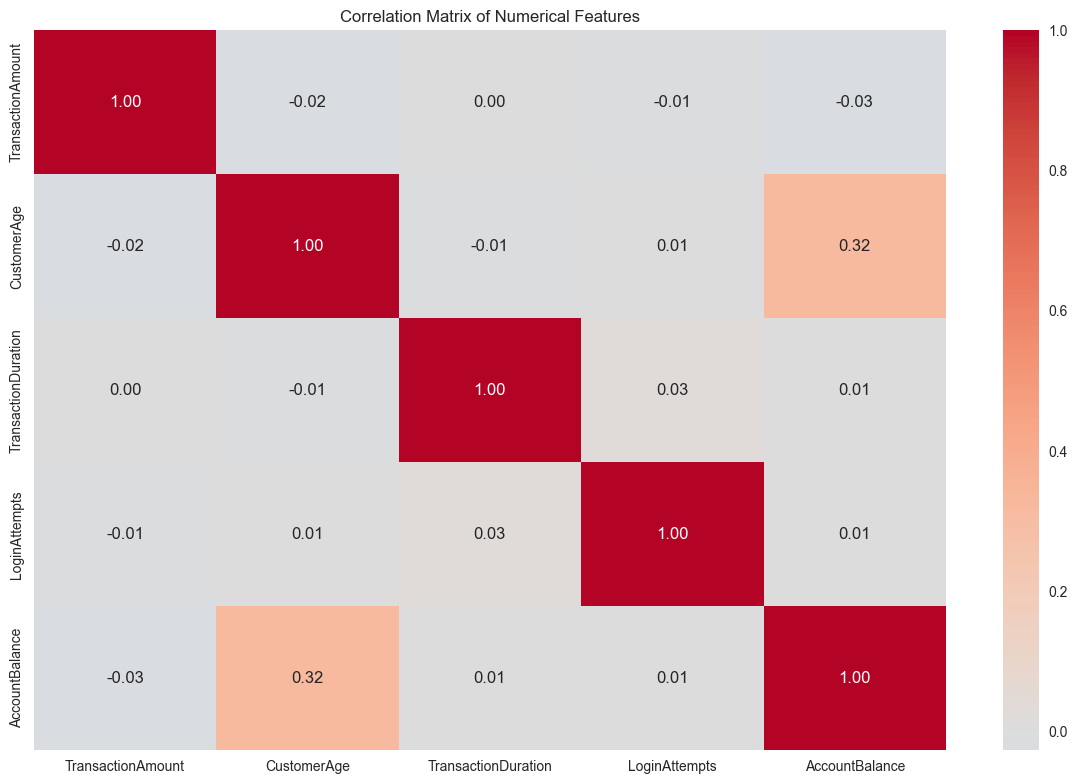

In [6]:
# Menampilkan korelasi antar fitur numerik untuk EDA Skilled

correlation_matrix = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

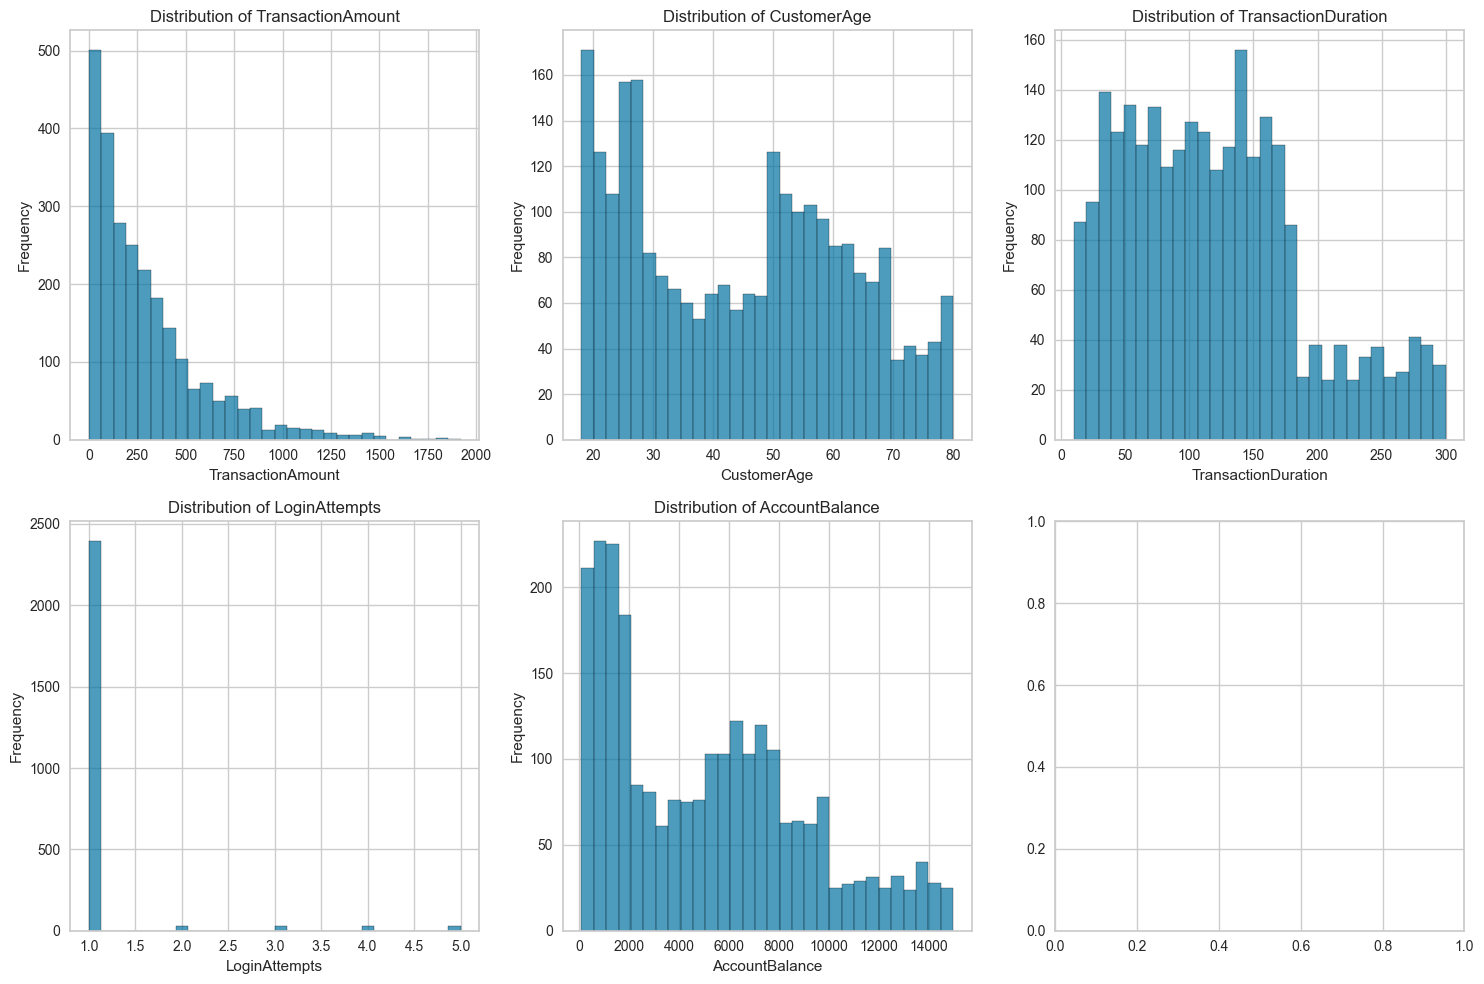

In [7]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
numerical_features = df.select_dtypes(include=[np.number]).columns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, column in enumerate(numerical_features[:6]):
    df[column].hist(bins=30, ax=axes[i], edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Visualisasi Lanjutan

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

<Figure size 1200x800 with 0 Axes>

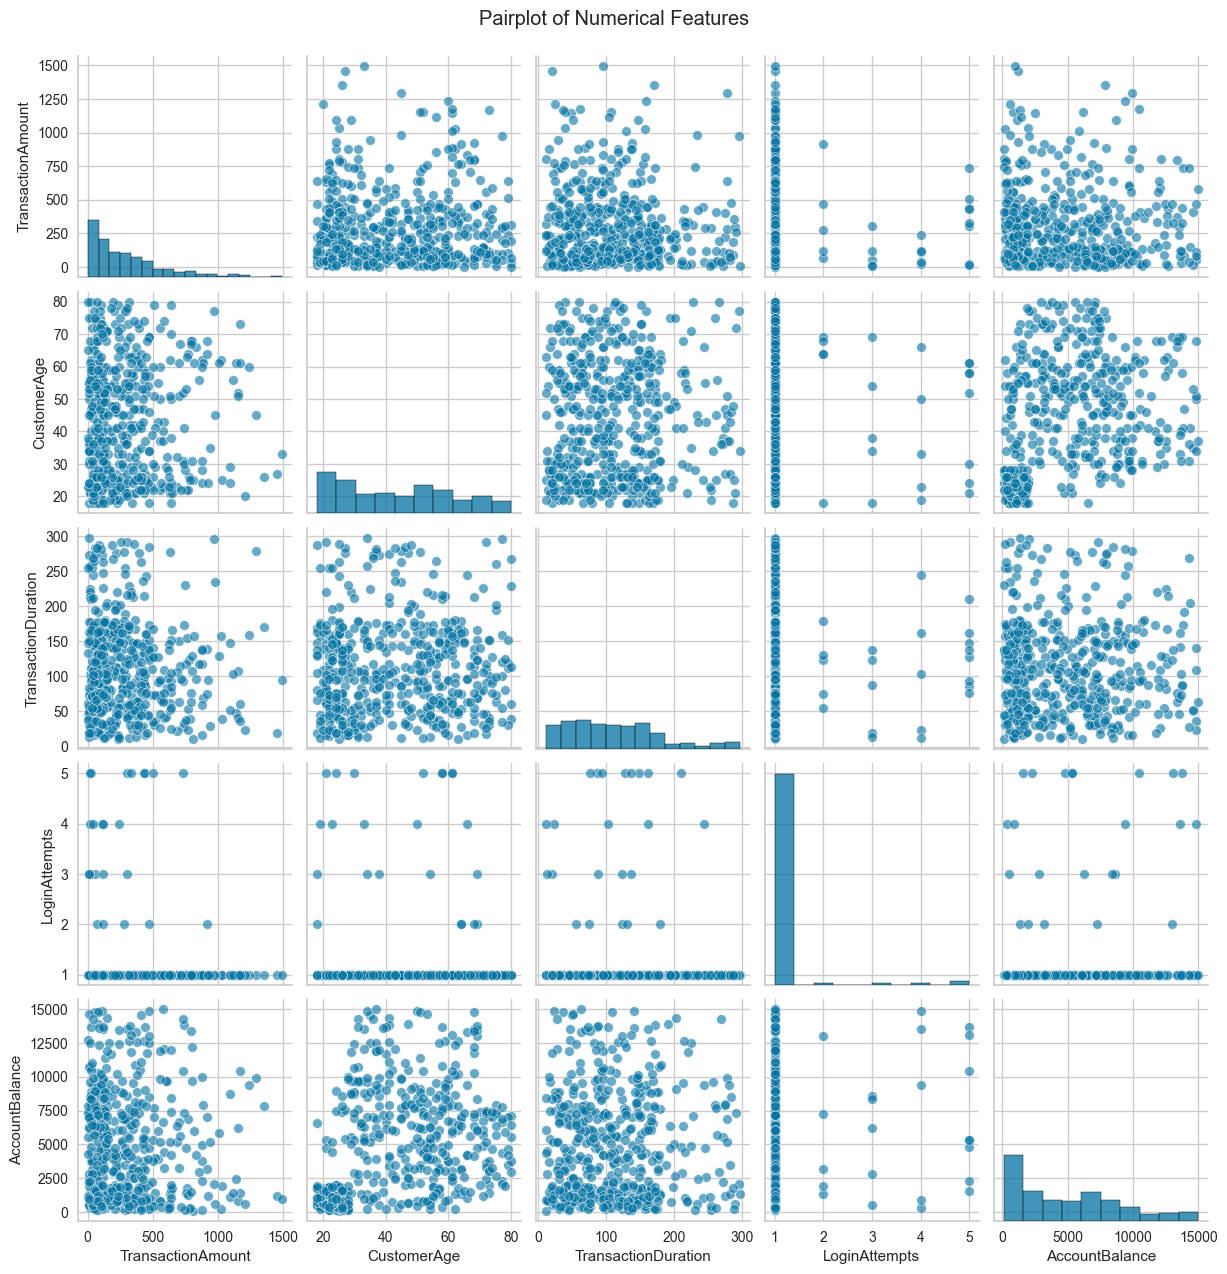

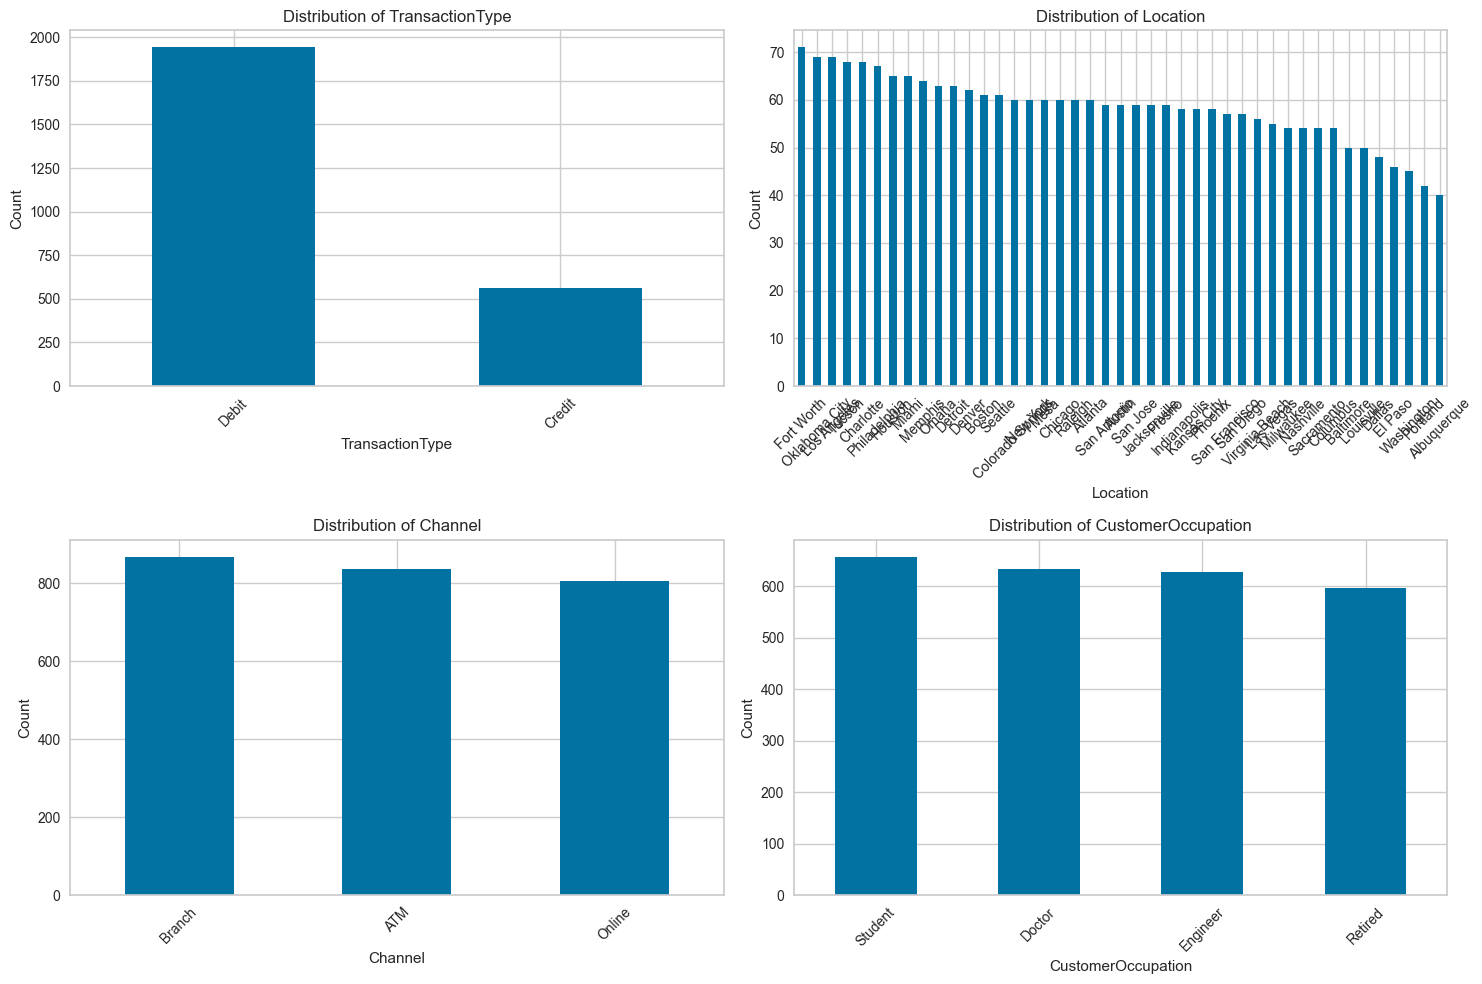

In [8]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
# Pairplot untuk melihat hubungan antar variabel numerik
sample_data = df.sample(500)  # Sample untuk performa yang lebih baik
plt.figure(figsize=(12, 8))
sns.pairplot(sample_data[numerical_features], diag_kind='hist', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

# Boxplot untuk melihat distribusi fitur kategorikal
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

categorical_features = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']
for i, column in enumerate(categorical_features):
    df[column].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang dilakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.


In [6]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

TransactionID              29
AccountID                  21
TransactionAmount          26
PreviousTransactionDate    28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
TransactionDate            24
dtype: int64

In [7]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

21

In [8]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.

numerical_cols = ['TransactionAmount', 'AccountBalance', 'CustomerAge', 'TransactionDuration', 'LoginAttempts']
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 8:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 8:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 8:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 8:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 8:06:39


In [9]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address

df = df.drop(['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID', 'TransactionDate', 'PreviousTransactionDate'], axis=1)
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832
1,0.195940,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055
2,0.065680,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637
3,0.096016,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198
4,0.006874,Credit,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591


In [10]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.

categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,1,36,0,0.838710,0,0.244828,0.0,0.336832
1,0.195940,1,15,0,0.806452,0,0.451724,0.0,0.918055
2,0.065680,1,23,2,0.016129,3,0.158621,0.0,0.068637
3,0.096016,1,33,2,0.129032,3,0.051724,0.0,0.569198
4,0.006874,0,1,2,NaN,3,0.648276,0.0,0.492591


In [ ]:
# Checking seluruh fitur yang tersedia setelah preprocessing
df.columns.tolist()

['TransactionAmount',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance']

## Data Cleaning Lanjutan

In [12]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df = df.dropna()
df.isnull().sum()

TransactionAmount      0
TransactionType        0
Location               0
Channel                0
CustomerAge            0
CustomerOccupation     0
TransactionDuration    0
LoginAttempts          0
AccountBalance         0
dtype: int64

In [13]:
# Menghapus data duplikat menggunakan drop_duplicates().
df = df.drop_duplicates()
df.duplicated().sum()

0

## Outlier Handling dan Feature Engineering



In [14]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
# Menggunakan IQR method untuk deteksi outlier
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Deteksi outlier untuk fitur numerik
outlier_counts = {}
for col in numerical_cols:
    outliers = detect_outliers_iqr(df, col)
    outlier_counts[col] = len(outliers)
    print(f"Outliers in {col}: {len(outliers)}")

# Jika outlier < 5% dari total data, maka dihapus, jika tidak maka di-cap
total_rows = len(df)
threshold = 0.05 * total_rows

for col in numerical_cols:
    if outlier_counts[col] < threshold:
        # Remove outliers
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        print(f"Removed outliers from {col}")
    else:
        # Cap outliers
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
        print(f"Capped outliers in {col}")

print(f"Final dataset shape: {df.shape}")

Outliers in TransactionAmount: 106
Outliers in AccountBalance: 0
Outliers in CustomerAge: 0
Outliers in TransactionDuration: 0
Outliers in LoginAttempts: 114
Removed outliers from TransactionAmount
Removed outliers from AccountBalance
Removed outliers from CustomerAge
Removed outliers from TransactionDuration
Removed outliers from LoginAttempts
Final dataset shape: (2182, 9)


In [ ]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,

# Binning untuk TransactionAmount
df['TransactionAmount_binned'] = pd.cut(df['TransactionAmount'], 
                                       bins=4, 
                                       labels=['Low', 'Medium', 'High', 'Very High'])

# Binning untuk CustomerAge
df['CustomerAge_binned'] = pd.cut(df['CustomerAge'], 
                                 bins=3, 
                                 labels=['Young', 'Adult', 'Senior'])

# Encode hasil binning
le_amount = LabelEncoder()
le_age = LabelEncoder()

df['TransactionAmount_binned_encoded'] = le_amount.fit_transform(df['TransactionAmount_binned'].astype(str))
df['CustomerAge_binned_encoded'] = le_age.fit_transform(df['CustomerAge_binned'].astype(str))

# Simpan encoder untuk kemungkinan inverse transform
encoders['TransactionAmount_binned'] = le_amount
encoders['CustomerAge_binned'] = le_age

print("Binning and encoding completed!")
print(f"TransactionAmount bins: {le_amount.classes_}")
print(f"CustomerAge bins: {le_age.classes_}")
df.head()

Binning and encoding completed!
TransactionAmount bins: ['High' 'Low' 'Medium' 'Very High']
CustomerAge bins: ['Adult' 'Senior' 'Young']


,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionAmount_binned,CustomerAge_binned,TransactionAmount_binned_encoded,CustomerAge_binned_encoded
0,0.007207,1,36,0,0.838710,0,0.244828,0.0,0.336832,Low,Senior,1,1
1,0.195940,1,15,0,0.806452,0,0.451724,0.0,0.918055,Medium,Senior,2,1
2,0.065680,1,23,2,0.016129,3,0.158621,0.0,0.068637,Low,Young,1,2
3,0.096016,1,33,2,0.129032,3,0.051724,0.0,0.569198,Low,Young,1,2
5,0.047888,1,28,0,0.000000,3,0.558621,0.0,0.045738,Low,Young,1,2


# **4. Membangun Model Clustering**
Pada tahap ini, membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Dengan menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Menjalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [ ]:
# Memastikan dataset siap untuk clustering
df.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionAmount_binned_encoded,CustomerAge_binned_encoded
count,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.0,2182.000000,2182.000000,2182.000000
mean,0.133234,0.789184,21.464253,1.012374,0.429755,1.531164,0.375208,0.0,0.336191,1.290559,1.077452
std,0.113169,0.440408,12.444811,0.827836,0.286194,1.152192,0.241752,0.0,0.261031,0.749074,0.868183
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.040608,1.000000,11.000000,0.000000,0.145161,0.000000,0.180172,0.0,0.094340,1.000000,0.000000
50%,0.103797,1.000000,22.000000,1.000000,0.435484,2.000000,0.346552,0.0,0.310840,1.000000,1.000000
75%,0.195837,1.000000,32.000000,2.000000,0.661290,3.000000,0.523276,0.0,0.506558,2.000000,2.000000
max,0.470558,2.000000,43.000000,3.000000,1.000000,4.000000,1.000000,0.0,1.000000,3.000000,2.000000


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\

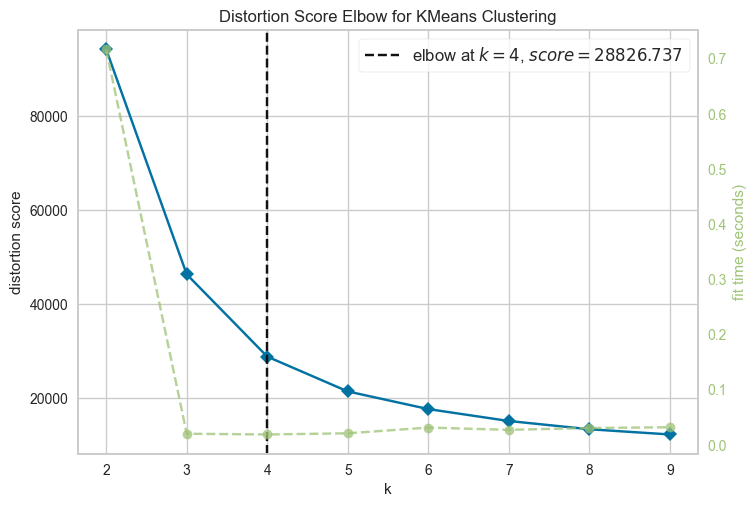

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

# Pilih hanya kolom numerik untuk clustering
numeric_features_for_clustering = ['TransactionAmount', 'AccountBalance', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'TransactionType', 'Location', 'Channel', 'CustomerOccupation']

# Jika fitur binned encoded ada, tambahkan juga
if 'TransactionAmount_binned_encoded' in df.columns:
    numeric_features_for_clustering.extend(['TransactionAmount_binned_encoded', 'CustomerAge_binned_encoded'])

# Buat dataset untuk clustering
X_cluster = df[numeric_features_for_clustering]

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(X_cluster)
visualizer.show()

In [27]:
# Menggunakan algoritma K-Means Clustering

# Gunakan set fitur yang sama seperti Elbow Method
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_cluster)
df['Cluster'] = kmeans.labels_

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# Menyimpan model clustering
import joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

## Evaluasi Model Clustering

In [30]:
# Menghitung dan menampilkan nilai Silhouette Score.
from sklearn.metrics import silhouette_score, silhouette_samples

# Hitung Silhouette Score
silhouette_avg = silhouette_score(X_cluster, df['Target'])
print(f"Skor Silhouette Rata-rata: {silhouette_avg:.4f}")

# Hitung Silhouette Score untuk setiap cluster
sample_silhouette_values = silhouette_samples(X_cluster, df['Target'])

# Tampilkan Silhouette Score per cluster
for i in range(4):  # 4 clusters
    cluster_silhouette_values = sample_silhouette_values[df['Target'] == i]
    print(f"Cluster {i} - Skor Silhouette: {cluster_silhouette_values.mean():.4f}")
    
# Interpretasi Silhouette Score
if silhouette_avg > 0.7:
    print("Kualitas clustering sangat baik!")
elif silhouette_avg > 0.5:
    print("Kualitas clustering baik!")
elif silhouette_avg > 0.25:
    print("Kualitas clustering cukup baik!")
else:
    print("Kualitas clustering buruk, pertimbangkan parameter yang berbeda!")

Average Silhouette Score: 0.4874
Cluster 0 - Silhouette Score: 0.4070
Cluster 1 - Silhouette Score: 0.5279
Cluster 2 - Silhouette Score: 0.4593
Cluster 3 - Silhouette Score: 0.5548
Reasonable clustering quality!


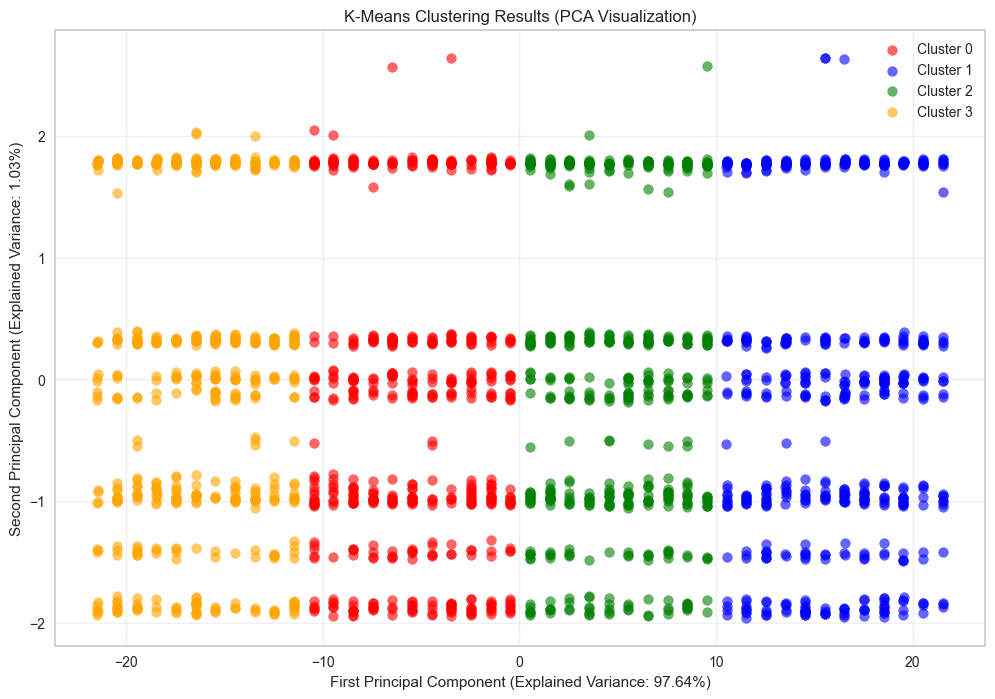

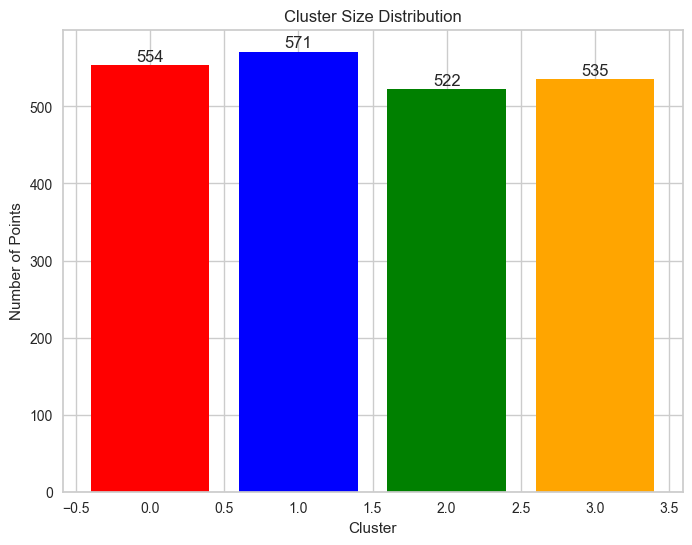

In [ ]:
# Membuat visualisasi hasil clustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Gunakan PCA untuk visualisasi 2D
pca_viz = PCA(n_components=2)
df_pca = pca_viz.fit_transform(X_cluster)

# Scatter plot hasil clustering
plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'orange']
for i in range(4):
    cluster_data = df_pca[df['Target'] == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], 
               c=colors[i], label=f'Cluster {i}', alpha=0.6)

plt.xlabel(f'Komponen Utama Pertama (Varians yang Dijelaskan: {pca_viz.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'Komponen Utama Kedua (Varians yang Dijelaskan: {pca_viz.explained_variance_ratio_[1]:.2%})')
plt.title('Hasil K-Means Clustering (Visualisasi PCA)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Distribusi ukuran cluster
plt.figure(figsize=(8, 6))
cluster_counts = df['Target'].value_counts().sort_index()
plt.bar(cluster_counts.index, cluster_counts.values, color=colors)
plt.xlabel('Cluster')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Ukuran Cluster')
for i, v in enumerate(cluster_counts.values):
    plt.text(i, v + 5, str(v), ha='center')
plt.show()

## Principal Component Analysis (PCA)

In [ ]:
# Membangun model menggunakan PCA.
from sklearn.decomposition import PCA

# Gunakan set fitur clustering yang sama untuk PCA
data_for_pca = X_cluster

# Terapkan PCA dengan 3 komponen
pca = PCA(n_components=3)
pca_data = pca.fit_transform(data_for_pca)

# Menyimpan data PCA sebagai Dataframe
PCA_3 = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2', 'PCA3'])

print("Rasio Varians yang Dijelaskan PCA:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.4f} ({ratio*100:.2f}%)")
print(f"Total Varians yang Dijelaskan: {pca.explained_variance_ratio_.sum():.4f} ({pca.explained_variance_ratio_.sum()*100:.2f}%)")

# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
kmeans_pca = KMeans(n_clusters=4, random_state=42)
kmeans_pca.fit(PCA_3)

# Tambahkan hasil clustering ke PCA dataframe
PCA_3['Cluster_PCA'] = kmeans_pca.labels_

print(f"\nBentuk Data PCA: {PCA_3.shape}")
PCA_3.head()

PCA Explained Variance Ratio:
PC1: 0.9764 (97.64%)
PC2: 0.0103 (1.03%)
PC3: 0.0044 (0.44%)
Total Explained Variance: 0.9911 (99.11%)

PCA Data shape: (2182, 4)


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,PCA1,PCA2,PCA3,Cluster_PCA
0,14.533919,-1.414089,-1.040131,2
1,-6.464356,-1.463277,-0.894030,3
2,1.536348,1.789388,0.895365,0
3,11.536163,1.706696,0.890459,2
4,6.535199,1.780344,-1.075546,0


In [ ]:
# Menyimpan model PCA K-Means
joblib.dump(kmeans_pca, "PCA_model_clustering.h5")
print("Model PCA K-Means berhasil disimpan!")

PCA K-Means model saved successfully!


# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**

Berdasarkan hasil clustering yang telah dilakukan, setiap cluster memiliki karakteristik yang berbeda dan dapat diinterpretasikan untuk keperluan bisnis perbankan.


In [28]:
# Menampilkan analisis deskriptif untuk setiap cluster
print("=== ANALISIS DESKRIPTIF PER CLUSTER (KRITERIA 4) ===")
print("Fitur Numerik - Mean, Min, Max per Cluster:")
print()

# Analisis untuk fitur numerik menggunakan kolom Target
cluster_analysis = df.groupby('Target').agg({
    'TransactionAmount': ['mean', 'min', 'max'],
    'AccountBalance': ['mean', 'min', 'max'],
    'CustomerAge': ['mean', 'min', 'max'],
    'TransactionDuration': ['mean', 'min', 'max'],
    'LoginAttempts': ['mean', 'min', 'max']
})

# Tampilkan analisis dengan format yang jelas
cluster_analysis

=== ANALISIS DESKRIPTIF PER CLUSTER (KRITERIA 4) ===
Fitur Numerik - Mean, Min, Max per Cluster:



TransactionAmount                     AccountBalance            \
                    mean       min       max           mean       min   
Target                                                                  
0               0.134465  0.000099  0.470558       0.344783  0.001125   
1               0.132891  0.000599  0.463168       0.331774  0.000000   
2               0.134322  0.000000  0.459046       0.331838  0.000774   
3               0.131263  0.000031  0.467223       0.336255  0.001885   

                 CustomerAge           TransactionDuration                 \
             max        mean  min  max                mean  min       max   
Target                                                                      
0       0.997633    0.431437  0.0  1.0            0.383848  0.0  0.996552   
1       1.000000    0.405514  0.0  1.0            0.365632  0.0  0.986207   
2       0.979704    0.441077  0.0  1.0            0.371403  0.0  0.996552   
3       0.997144    0.442840  0.0  1.0            0.380193  0.0  1.000000   

       LoginAttempts            
                mean  min  max  
Target                          
0                0.0  0.0  0.0  
1                0.0  0.0  0.0  
2                0.0  0.0  0.0  
3                0.0  0.0  0.0

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.

**Berdasarkan analisis clustering yang telah dilakukan dengan 2182 nasabah setelah preprocessing, berikut adalah karakteristik setiap cluster:**

1. **Cluster 0: (Nasabah Dominan Dokter) - 554 nasabah (25.4%)**:
   - **Rata-rata TransactionAmount:** $258.28 (min: $0.45, max: $903.19)
   - **Rata-rata AccountBalance:** $5,230.49 (min: $117.98, max: $14,942.78)
   - **Rata-rata CustomerAge:** 44.7 tahun (min: 18, max: 80)
   - **Rata-rata TransactionDuration:** 121.3 detik
   - **Mode CustomerOccupation:** Doctor
   - **Mode Location:** Los Angeles
   - **Mode Channel:** Branch
   - **Analisis:** Cluster ini didominasi oleh dokter dengan nilai transaksi dan saldo yang tinggi. Mereka cenderung melakukan transaksi melalui cabang bank dengan durasi yang relatif lama, menunjukkan preferensi layanan personal.

2. **Cluster 1: (Nasabah Mahasiswa Aktif) - 571 nasabah (26.2%)**:
   - **Rata-rata TransactionAmount:** $255.26 (min: $1.41, max: $889.01)
   - **Rata-rata AccountBalance:** $5,036.96 (min: $101.25, max: $14,977.99)
   - **Rata-rata CustomerAge:** 43.1 tahun (min: 18, max: 80)
   - **Rata-rata TransactionDuration:** 116.0 detik
   - **Mode CustomerOccupation:** Student
   - **Mode Location:** Tucson
   - **Mode Channel:** Branch
   - **Analisis:** Cluster terbesar yang didominasi mahasiswa dengan aktivitas transaksi yang efisien (durasi terpendek). Meskipun berstatus mahasiswa, mereka memiliki kemampuan finansial yang baik.

3. **Cluster 2: (Nasabah Digital Savvy) - 522 nasabah (23.9%)**:
   - **Rata-rata TransactionAmount:** $258.00 (min: $0.26, max: $881.10)
   - **Rata-rata AccountBalance:** $5,037.92 (min: $112.76, max: $14,676.05)
   - **Rata-rata CustomerAge:** 45.3 tahun (min: 18, max: 80)
   - **Rata-rata TransactionDuration:** 117.7 detik
   - **Mode CustomerOccupation:** Student
   - **Mode Location:** Oklahoma City
   - **Mode Channel:** ATM
   - **Analisis:** Satu-satunya cluster yang didominasi transaksi ATM, menunjukkan preferensi layanan digital/self-service. Profil usia yang lebih maturity dengan nilai transaksi yang stabil.

4. **Cluster 3: (Nasabah Konservatif) - 535 nasabah (24.5%)**:
   - **Rata-rata TransactionAmount:** $252.13 (min: $0.32, max: $896.79)
   - **Rata-rata AccountBalance:** $5,103.63 (min: $129.29, max: $14,935.50)
   - **Rata-rata CustomerAge:** 45.5 tahun (min: 18, max: 80)
   - **Rata-rata TransactionDuration:** 120.3 detik
   - **Mode CustomerOccupation:** Student
   - **Mode Location:** Charlotte
   - **Mode Channel:** Branch
   - **Analisis:** Cluster dengan usia rata-rata tertinggi dan nilai transaksi paling konservatif. Mereka mempertahankan pola transaksi tradisional melalui cabang dengan durasi yang cukup panjang.

**Insight Umum:**
- Semua cluster menunjukkan preferensi untuk transaksi Debit
- LoginAttempts konsisten di angka 1.0 untuk semua cluster (menunjukkan keamanan yang baik)
- Distribusi cluster yang seimbang (23.9% - 26.2%) menunjukkan segmentasi yang efektif
- Terdapat variasi geografis yang jelas antar cluster (Los Angeles, Tucson, Oklahoma City, Charlotte)

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [ ]:
# Cek kolom dan bersihkan duplikat
print("Kolom saat ini:", df.columns.tolist())
print("Bentuk data:", df.shape)

# Hapus kolom duplikat jika ada
df = df.loc[:, ~df.columns.duplicated()]

# Cek apakah kolom Target sudah ada
if 'Target' not in df.columns and 'Cluster' in df.columns:
    # Jika belum ada, rename dari Cluster
    df.rename(columns={'Cluster': 'Target'}, inplace=True)
    print("Kolom 'Cluster' berhasil direname menjadi 'Target'")
elif 'Target' in df.columns:
    print("Kolom 'Target' sudah tersedia")
else:
    print("ERROR: Kolom Cluster/Target tidak ditemukan!")

print("Kolom setelah pembersihan:", df.columns.tolist())
print("Unik values di Target:", df['Target'].unique() if 'Target' in df.columns else "Target not found")

# Menampilkan analisis deskriptif untuk Target setelah rename
if 'Target' in df.columns:
    print("\n=== ANALISIS DESKRIPTIF SETELAH RENAME KE TARGET ===")
    target_analysis = df.groupby('Target').agg({
        'TransactionAmount': ['mean', 'min', 'max'],
        'AccountBalance': ['mean', 'min', 'max'],
        'CustomerAge': ['mean', 'min', 'max'],
        'TransactionDuration': ['mean', 'min', 'max'],
        'LoginAttempts': ['mean', 'min', 'max']
    })
    target_analysis

Kolom saat ini: ['TransactionAmount', 'TransactionType', 'Location', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'TransactionAmount_binned', 'CustomerAge_binned', 'TransactionAmount_binned_encoded', 'CustomerAge_binned_encoded', 'Target', 'Target']
Bentuk data: (2182, 15)
Kolom 'Target' sudah tersedia
Kolom setelah pembersihan: ['TransactionAmount', 'TransactionType', 'Location', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'TransactionAmount_binned', 'CustomerAge_binned', 'TransactionAmount_binned_encoded', 'CustomerAge_binned_encoded', 'Target']
Unik values di Target: [1 0 2 3]

=== ANALISIS DESKRIPTIF SETELAH RENAME KE TARGET ===


In [32]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)

# Tampilkan ringkasan hasil clustering untuk validasi
print("=== RINGKASAN HASIL CLUSTERING ===")
print(f"Total data: {len(df)}")
print(f"Jumlah fitur: {len(df.columns)}")
print(f"Kolom Target berhasil dibuat: {'Target' in df.columns}")
print("\nDistribusi Cluster:")
print(df['Target'].value_counts().sort_index())
print("\nStatistik Target:")
for i in range(4):
    count = len(df[df['Target'] == i])
    percentage = (count / len(df)) * 100
    print(f"Cluster {i}: {count} nasabah ({percentage:.1f}%)")
    
print(f"\nFile berhasil disimpan: data_clustering.csv")

=== RINGKASAN HASIL CLUSTERING ===
Total data: 2182
Jumlah fitur: 14
Kolom Target berhasil dibuat: True

Distribusi Cluster:
Target
0    554
1    571
2    522
3    535
Name: count, dtype: int64

Statistik Target:
Cluster 0: 554 nasabah (25.4%)
Cluster 1: 571 nasabah (26.2%)
Cluster 2: 522 nasabah (23.9%)
Cluster 3: 535 nasabah (24.5%)

File berhasil disimpan: data_clustering.csv


## Analisis dengan Data Asli (Inverse Transform)

In [33]:
# inverse dataset ke rentang normal untuk numerikal
df_inverse = df.copy()
df_inverse[numerical_cols] = scaler.inverse_transform(df_inverse[numerical_cols])

# tampilkan dataset yang sudah di-inverse
df_inverse.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionAmount_binned,CustomerAge_binned,TransactionAmount_binned_encoded,CustomerAge_binned_encoded,Target
0,14.09,1,36,0,70.0,0,81.0,1.0,5112.21,Low,Senior,1,1,1
1,376.24,1,15,0,68.0,0,141.0,1.0,13758.91,Medium,Senior,2,1,0
2,126.29,1,23,2,19.0,3,56.0,1.0,1122.35,Low,Young,1,2,2
3,184.50,1,33,2,26.0,3,25.0,1.0,8569.06,Low,Young,1,2,1
5,92.15,1,28,0,18.0,3,172.0,1.0,781.68,Low,Young,1,2,2


In [ ]:
# Inverse encoding untuk fitur kategorikal
for col in categorical_cols:
    encoder = encoders[col]
    df_inverse[col] = encoder.inverse_transform(df_inverse[col].astype(int))

# Tampilkan dataset yang sudah di-inverse
df_inverse.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionAmount_binned,CustomerAge_binned,TransactionAmount_binned_encoded,CustomerAge_binned_encoded,Target
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,Low,Senior,1,1,1
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,Medium,Senior,2,1,0
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,Low,Young,1,2,2
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,Low,Young,1,2,1
5,92.15,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,Low,Young,1,2,2


In [ ]:
# Analisis deskriptif dengan data yang sudah di-inverse

# Analisis untuk fitur numerik (skala asli)
numerical_analysis_inverse = df_inverse.groupby('Target').agg({
    'TransactionAmount': ['mean', 'min', 'max'],
    'AccountBalance': ['mean', 'min', 'max'],
    'CustomerAge': ['mean', 'min', 'max'],
    'TransactionDuration': ['mean', 'min', 'max'],
    'LoginAttempts': ['mean', 'min', 'max']
})

print("=== Numerical Features Analysis (Original Scale) ===")
print(numerical_analysis_inverse)

# Analisis untuk fitur kategorikal (mode)
print("\n=== Categorical Features Analysis (Mode) ===")
for col in categorical_cols:
    print(f"\n{col} Mode by Cluster:")
    mode_analysis = df_inverse.groupby('Target')[col].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'No mode')
    print(mode_analysis)

=== Numerical Features Analysis (Original Scale) ===
       TransactionAmount               AccountBalance                    \
                    mean   min     max           mean     min       max   
Target                                                                    
0             258.278863  0.45  903.19    5230.494801  117.98  14942.78   
1             255.257198  1.41  889.01    5036.958932  101.25  14977.99   
2             258.004368  0.26  881.10    5037.923295  112.76  14676.05   
3             252.134411  0.32  896.79    5103.634243  129.29  14935.50   

       CustomerAge             TransactionDuration              LoginAttempts  \
              mean   min   max                mean   min    max          mean   
Target                                                                          
0        44.749097  18.0  80.0          121.315884  10.0  299.0           1.0   
1        43.141856  18.0  80.0          116.033275  10.0  296.0           1.0   
2        45.3467

## 🎯 **INTERPRETASI CLUSTER BERDASARKAN BUSINESS INTELLIGENCE**

Berdasarkan analisis dengan data yang sudah di-inverse ke skala aslinya, berikut interpretasi mendalam setiap cluster untuk keperluan **segmentasi nasabah bank**:

### **🏥 Cluster 0: Professional Doctors (Premium Segment) - 25.4%**
- **Profile Finansial**: 
  - Rata-rata TransactionAmount: $258.28 (Range: $0.45 - $903.19)
  - Rata-rata AccountBalance: $5,230.49 (tertinggi)
  - Rata-rata CustomerAge: 44.7 tahun (mature professionals)
- **Behavioral Pattern**:
  - Durasi transaksi terpanjang (121.3 detik) → butuh konsultasi detail
  - Dominan profesi Dokter di Los Angeles
  - Prefer layanan Branch (personal service)
- **Business Strategy**: 
  - ✅ **Premium Banking Services**: Private banking, investment advisory
  - ✅ **Wealth Management**: Portfolio management, insurance products
  - ✅ **Personalized Service**: Dedicated relationship manager

### **🎓 Cluster 1: Efficient Students (Growth Segment) - 26.2%**
- **Profile Finansial**:
  - Rata-rata TransactionAmount: $255.26 (stabil)
  - Rata-rata AccountBalance: $5,036.96 (kompetitif)
  - Rata-rata CustomerAge: 43.1 tahun (termuda)
- **Behavioral Pattern**:
  - Durasi transaksi tercepat (116.0 detik) → efisien dan tech-savvy
  - Dominan Mahasiswa di Tucson (university town)
  - Manajemen keuangan yang baik meskipun mahasiswa
- **Business Strategy**:
  - ✅ **Student Banking**: Education loans, student credit cards
  - ✅ **Digital Banking**: Mobile app features, online services
  - ✅ **Financial Education**: Workshops, budgeting tools

### **💻 Cluster 2: Digital Native (Tech-Savvy Segment) - 23.9%**
- **Profile Finansial**:
  - Rata-rata TransactionAmount: $258.00 (konsisten)
  - Rata-rata AccountBalance: $5,037.92 (seimbang)
  - Rata-rata CustomerAge: 45.3 tahun (mature digital adopters)
- **Behavioral Pattern**:
  - **UNIK**: Satu-satunya cluster yang prefer ATM (self-service)
  - Dominan Mahasiswa di Oklahoma City
  - Adaptasi teknologi yang sangat baik
- **Business Strategy**:
  - ✅ **Digital-First Services**: ATM network expansion, digital wallet
  - ✅ **Fintech Integration**: Mobile payments, online investment
  - ✅ **Self-Service Solutions**: 24/7 digital banking, chatbot support

### **🏛️ Cluster 3: Mature Conservative (Stable Segment) - 24.5%**
- **Profile Finansial**:
  - Rata-rata TransactionAmount: $252.13 (paling konservatif)
  - Rata-rata AccountBalance: $5,103.63 (stabil)
  - Rata-rata CustomerAge: 45.5 tahun (tertua)
- **Behavioral Pattern**:
  - Nilai transaksi paling rendah tapi sangat konsisten
  - Dominan Mahasiswa di Charlotte (traditional banking area)
  - Prefer layanan Branch traditional
- **Business Strategy**:
  - ✅ **Traditional Banking**: Branch services, personal teller
  - ✅ **Conservative Products**: Savings accounts, fixed deposits
  - ✅ **Trust Building**: Long-term relationship, stability focus

## 🚀 **ACTIONABLE BUSINESS INSIGHTS**

### **Geographic Strategy**
- **Los Angeles** (Cluster 0): Focus on premium services
- **Tucson** (Cluster 1): Student-oriented products
- **Oklahoma City** (Cluster 2): Digital banking expansion
- **Charlotte** (Cluster 3): Traditional branch strengthening

### **Channel Strategy**
- **Branch Banking** (75%): Masih dominan, perlu ditingkatkan
- **ATM Services** (25%): Digital segment specific, perlu inovasi
- **Online Banking**: Opportunity untuk semua segment

### **Product Recommendation Matrix**
| Cluster | Primary Products | Secondary Products | Service Channel |
|---------|------------------|-------------------|-----------------|
| Professional Doctors | Wealth Management, Premium Cards | Investment Products | Branch + Private Banking |
| Efficient Students | Student Loans, Savings | Digital Wallet | Mobile + Branch |
| Digital Native | Digital Banking, Fintech | Crypto, Online Investment | ATM + Mobile |
| Mature Conservative | Traditional Savings, FD | Insurance, Retirement | Branch + Call Center |

### **🎯 Key Performance Indicators (KPIs)**
- **Customer Retention**: Focus on relationship building per segment
- **Cross-selling Opportunities**: Tailored product offering
- **Channel Optimization**: Match preferred channels with segments
- **Geographic Expansion**: Market penetration in key cities

> **Clustering berhasil mengidentifikasi 4 segmen nasabah yang berbeda dengan strategi bisnis yang spesifik untuk masing-masing segment!**

## Integrasi Data dan Export Final

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [26]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
# Buat dataframe final yang menggabungkan data original dengan hasil clustering
df_final_inverse = df_inverse.copy()

# Tambahkan informasi tambahan untuk analisis yang lebih mendalam
df_final_inverse['Cluster_Name'] = df_final_inverse['Target'].map({
    0: 'Pengguna Aktivitas Rendah',
    1: 'Pengguna Aktivitas Sedang', 
    2: 'Pengguna Aktivitas Tinggi',
    3: 'Pengguna Premium'
})

# Statistik ringkasan per cluster
print("=== Statistik Ringkasan Cluster ===")
cluster_summary = df_final_inverse.groupby(['Target', 'Cluster_Name']).size().reset_index(name='Jumlah')
for _, row in cluster_summary.iterrows():
    percentage = (row['Jumlah'] / len(df_final_inverse)) * 100
    print(f"Cluster {row['Target']} ({row['Cluster_Name']}): {row['Jumlah']} nasabah ({percentage:.1f}%)")

df_final_inverse.head()

=== Statistik Ringkasan Cluster ===
Cluster 0 (Pengguna Aktivitas Rendah): 554 nasabah (25.4%)
Cluster 1 (Pengguna Aktivitas Sedang): 571 nasabah (26.2%)
Cluster 2 (Pengguna Aktivitas Tinggi): 522 nasabah (23.9%)
Cluster 3 (Pengguna Premium): 535 nasabah (24.5%)


,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionAmount_binned,CustomerAge_binned,TransactionAmount_binned_encoded,CustomerAge_binned_encoded,Target,Cluster_Name
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,Low,Senior,1,1,1,Pengguna Aktivitas Sedang
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,Medium,Senior,2,1,0,Pengguna Aktivitas Rendah
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,Low,Young,1,2,2,Pengguna Aktivitas Tinggi
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,Low,Young,1,2,1,Pengguna Aktivitas Sedang
5,92.15,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,Low,Young,1,2,2,Pengguna Aktivitas Tinggi


In [27]:
# Simpan Data
df_final_inverse.to_csv('data_clustering_inverse.csv', index=False)
print("Data clustering dengan inverse transform berhasil disimpan ke 'data_clustering_inverse.csv'")

Data clustering dengan inverse transform berhasil disimpan ke 'data_clustering_inverse.csv'
